In [6]:
import theano.tensor as T
from theano.tensor.nnet import conv
import numpy as np
import theano

In [8]:
rng = np.random.RandomState(1234)
input = T.tensor4(name='input')
w_shp = (2, 3, 9, 9)
w_bound = np.sqrt(3 * 9 * 9)
W = theano.shared(np.asarray(rng.uniform(low = -1.0 / w_bound, high = 1.0 / w_bound, size = w_shp),
                             dtype = input.type), name = 'W')
b_shp = (2, )
b = theano.shared(np.asarray(rng.uniform(low = -.5, high = .5, size = b_shp), 
                             dtype = input.type), name = 'b')
conv_out = conv.conv2d(input, W)
output = T.nnet.sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))
f = theano.function([input], output)

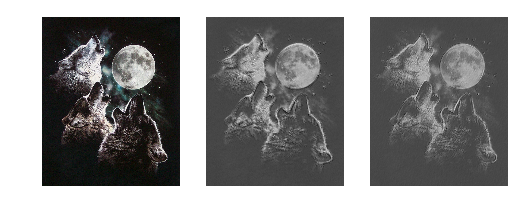

In [12]:
import numpy as np
import pylab
from PIL import Image

img = Image.open(open('./3wolfmoon.jpg'))
img = np.asarray(img, dtype='float64') / 256
img_ = img.swapaxes(0, 2).swapaxes(1, 2).reshape(1, 3, 639, 516)
filtered_img = f(img_)
pylab.subplot(1, 3, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();
pylab.subplot(1, 3, 2); pylab.axis('off'); pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3); pylab.axis('off'); pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()